In [43]:
import numpy as np
import pandas as pd

df=pd.read_csv("housing.csv")

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


housing_median_age - mode is 52, but the most populated bin is the peak
median_income - mode and approx peak is around 3.25

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

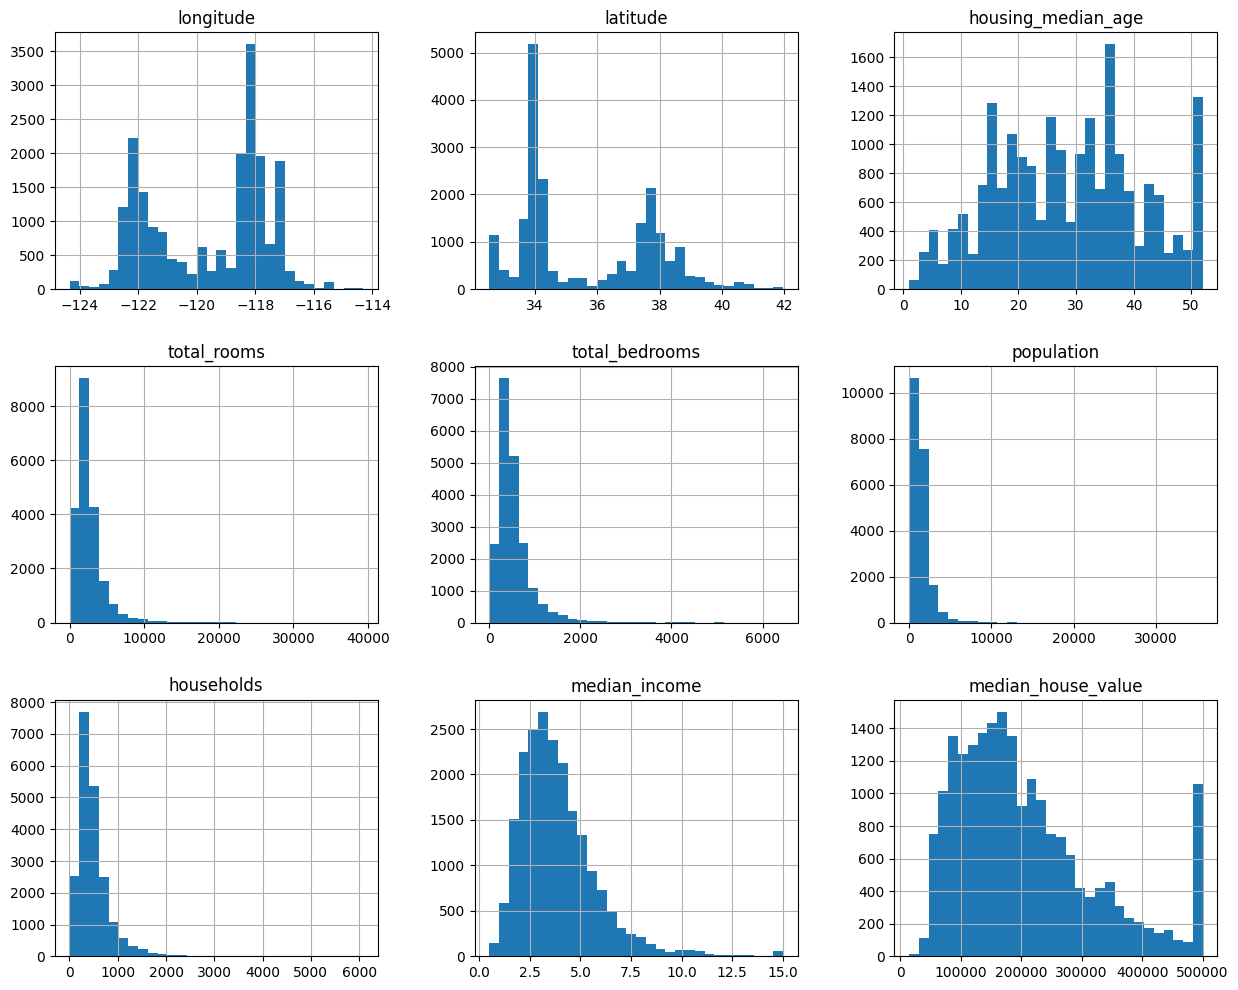

In [18]:
import matplotlib.pyplot as plt

# Plot a histogram of median house values
df.hist(bins=30, figsize=(15, 12))


Random Test Set - for small/skewed datasets, important subgroups may be under-represented. Not ideal when one feature strongly affects target.

In [44]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print("Train size: ", len(train_set))
print("Test size: ", len(test_set))

Train size:  16512
Test size:  4128


Stratified Test Set - preserves the proportion of important features (like income)

In [45]:
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_idx]
    strat_test_set = df.loc[test_idx]

for set_ in(strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

print("Stratified Train size: ", len(strat_train_set))
print("Stratified Test size: ", len(strat_test_set))


Stratified Train size:  16512
Stratified Test size:  4128


Visualising Geographical Data

/tmp/ipython-input-888919759.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


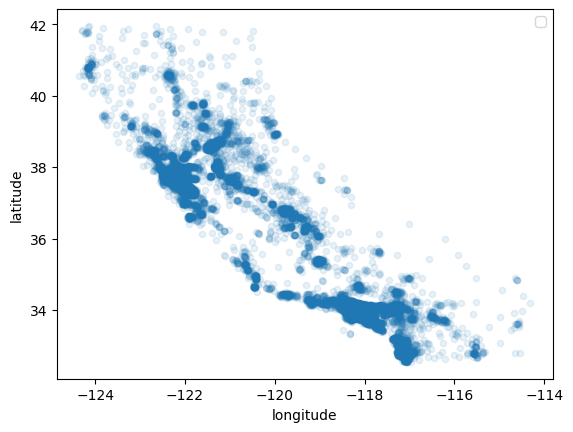

In [46]:
train_set.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

plt.legend()

<Axes: xlabel='longitude', ylabel='latitude'>

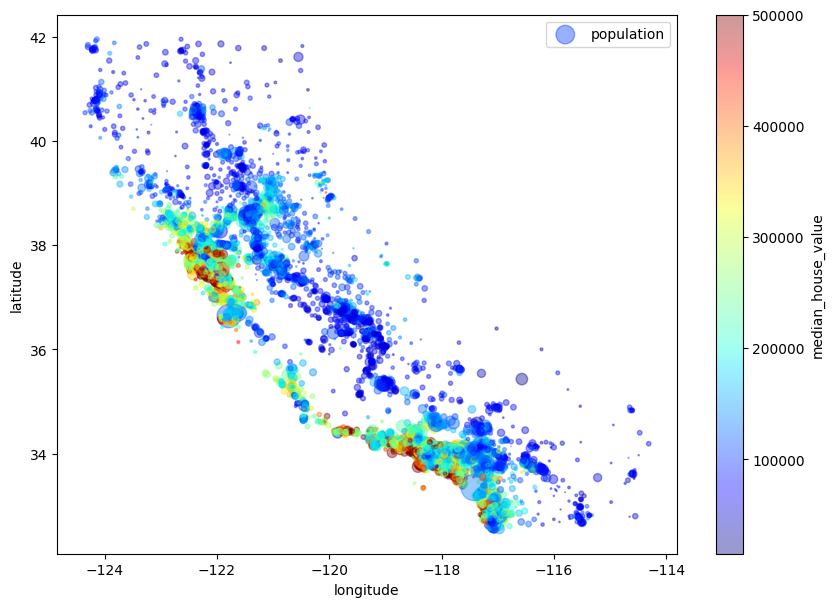

In [47]:
train_set.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=train_set["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [ ]:
Correlation Analysis

In [48]:
housing_num = df.select_dtypes(include=[np.number])

corr_matrix = housing_num.corr()

print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


<Axes: xlabel='median_income', ylabel='median_house_value'>

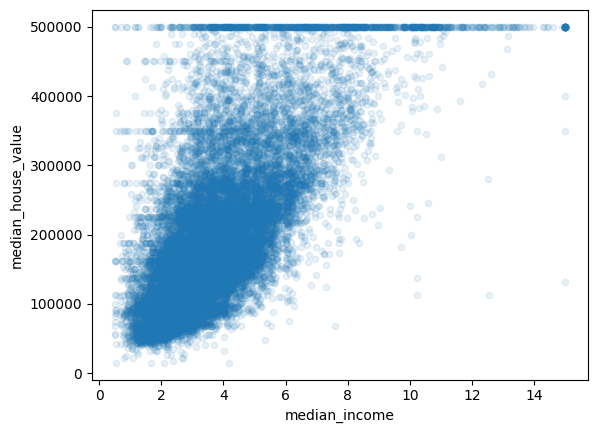

In [49]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)


Correlation Improvement

In [50]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

housing_num = df.select_dtypes(include=[np.number])

corr_matrix = housing_num.corr()

print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


Data Cleaning

In [51]:
# Check for missing values in each column

missing_values = df.isnull().sum()

# Display columns with missing values

print(missing_values[missing_values > 0])

total_bedrooms       207
bedrooms_per_room    207
dtype: int64


In [52]:
housing_copy=df

#Option-1: Get rid of the corresponding districts.

housing_copy.dropna(subset=["bedrooms_per_room"])

#Option-2: Get rid of the whole attribute.

housing_copy.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [56]:
from sklearn.impute import SimpleImputer

# Step 1: Create an instance of SimpleImputer with the median strategy

imputer = SimpleImputer(strategy="median")

housing_copy=df

# Step 2: Fit the imputer on the "total_bedrooms" column

# Note: SimpleImputer expects a 2D array, so we reshape the column

imputer.fit(housing_copy[["total_bedrooms"]])

# Step 3: Transform (fill) the missing values in the "total_bedrooms" column

housing_copy["total_bedrooms"] = imputer.transform(df[["total_bedrooms"]])

# Verify that there are no missing values left

print(housing_copy["total_bedrooms"].isnull().sum())

0


One-hot encoding

In [70]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat = df[["ocean_proximity"]]

housing_cat_encoded = encoder.fit_transform(housing_cat)


,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


Feature Scaling and ML Pipeline

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:,5] / X[:,6]
        return np.c_[X, rooms_per_household, population_per_household]


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, housing_num.columns),
    ("cat", OneHotEncoder(), ["ocean_proximity"])
])

housing_prepared = full_pipeline.fit_transform(df)
